In [205]:
import spacy
import pandas as pd
import numpy as np
import json
from glob import glob
#from plotly import express as px

In [5]:
nlp = spacy.load('out/model-best')

In [6]:
test = """It was as old-fashioned as it was small, and it rested in the lap of an undulating upland adjoining the North Wessex downs. 
Old as it was, however, the well-shaft was probably the only relic of the local history that remained absolutely unchanged. 
Many of the thatched and dormered dwelling-houses had been pulled down of late years, and many trees felled on the green. 
Above all, the original church, hump-backed, wood-turreted, and quaintly hipped, had been taken down, and either cracked up 
into heaps of road-metal in the lane, or utilized as pig-sty walls, garden seats, guard-stones to fences, and rockeries 
in the flower-beds of the neighbourhood. In place of it a tall new building of modern Gothic design, unfamiliar to English eyes, 
had been erected on a new piece of ground by a certain obliterator of historic records who had run down from London and back in a day.
The site whereon so long had stood the ancient temple to the Christian divinities was not even recorded on the green and level 
grass-plot that had immemorially been the churchyard, the obliterated graves being commemorated by eighteen-penny cast-iron 
crosses warranted to last five years."""


In [7]:
doc = nlp(test)

In [8]:
doc.cats

{'desc': 0.9999923706054688, 'notdesc': 1.9932370420860934e-08}

In [11]:
with open('jude.txt') as f: 
    jude = f.read()

In [13]:
start = "Part First AT MARYGREEN"
end = "*** END OF THE PROJECT GUTENBERG EBOOK"
jude = jude[jude.find(start):jude.find(end)]

In [219]:
with open('pg-stats.jsonl', 'r') as f: 
    existingStats = f.read()

In [244]:
def getDescriptionStats(fn, cutoff=60):
    with open(fn) as f: 
        rawText = f.read()
    rawParas = rawText.split('\n\n')
    substantialParas = [para for para in rawParas if len(para) > cutoff]
    print(f"Using {len(substantialParas)} out of {len(rawParas)} total paragraphs.")
    docs = [nlp(para) for para in substantialParas]
    descStats = {}
    for i, doc in enumerate(docs): 
        if doc.cats['desc'] > 0.95 and (doc.cats['desc'] > doc.cats['notdesc']): 
            # print('DESCRIPTION: ', doc, doc.cats)
            descStats[i] = 1
        else: 
            # print('NOT DESCRIPTION: ', doc, doc.cats)
            descStats[i] = 0
    s = pd.Series(descStats)
    df = pd.DataFrame(s, columns=['desc'])
    return df

def computeDescriptionStats(df, fn):
    nPars = len(df)
    nDescs = sum(df['desc'])
    percDesc = (nDescs / nPars)*100
    dist = df.groupby(pd.qcut(df.index, 100, precision=0)).sum()
    dist.index = range(100)
    return {"fn": fn, "nPars": nPars, "nDescs": nDescs, "percDesc": percDesc, "dist": dist.to_json()}

def analyzePG():
    for file in sorted(glob('pg-text2/*')):
        # Do we already have it? 
        print(file[9:-5])
        if file[9:-5] in existingStats: 
            print(f"We already have {file}, skipping")
            continue
        with open('pg-stats.jsonl', 'a') as f:
            print(f"processing {file}")
            df = getDescriptionStats(file)
            stats = computeDescriptionStats(df, file)
            print(stats)
            out = json.dumps(stats, ensure_ascii=False) + '\n'
            f.write(out)


In [249]:
analyzePG()

1800-CastleRackrent-1424.
processing pg-text2/1800-CastleRackrent-1424.0.txt
Using 382 out of 527 total paragraphs.
{'fn': 'pg-text2/1800-CastleRackrent-1424.0.txt', 'nPars': 382, 'nDescs': 85, 'percDesc': 22.25130890052356, 'dist': '{"desc":{"0":1,"1":3,"2":1,"3":1,"4":2,"5":1,"6":3,"7":2,"8":3,"9":1,"10":2,"11":3,"12":1,"13":2,"14":1,"15":0,"16":3,"17":2,"18":2,"19":2,"20":1,"21":0,"22":0,"23":0,"24":0,"25":2,"26":3,"27":2,"28":0,"29":1,"30":0,"31":1,"32":1,"33":0,"34":0,"35":2,"36":1,"37":2,"38":0,"39":2,"40":2,"41":0,"42":0,"43":1,"44":0,"45":0,"46":0,"47":0,"48":0,"49":1,"50":0,"51":0,"52":0,"53":2,"54":0,"55":1,"56":0,"57":0,"58":0,"59":0,"60":0,"61":0,"62":3,"63":0,"64":1,"65":1,"66":0,"67":1,"68":0,"69":1,"70":0,"71":0,"72":0,"73":0,"74":0,"75":0,"76":2,"77":1,"78":0,"79":0,"80":0,"81":0,"82":2,"83":1,"84":0,"85":1,"86":1,"87":1,"88":2,"89":0,"90":0,"91":1,"92":2,"93":0,"94":0,"95":1,"96":0,"97":0,"98":1,"99":1}}'}
1800-TheFarmersBoyARuralPoem-9092.
processing pg-text2/1800-The

In [172]:
df = getDescriptionStats('jude.txt')

Using 2692 out of 3769 total paragraphs.


In [201]:
stats = computeDescriptionStats(df, 'jude')

In [202]:
stats

{'fn': 'jude',
 'nPars': 2692,
 'nDescs': 257,
 'percDesc': 9.546805349182764,
 'dist': '{"desc":{"0":1,"1":10,"2":8,"3":6,"4":2,"5":6,"6":3,"7":2,"8":5,"9":1,"10":3,"11":4,"12":1,"13":2,"14":2,"15":2,"16":10,"17":5,"18":5,"19":7,"20":4,"21":4,"22":4,"23":4,"24":4,"25":4,"26":7,"27":3,"28":3,"29":8,"30":1,"31":0,"32":1,"33":4,"34":9,"35":1,"36":1,"37":5,"38":6,"39":2,"40":2,"41":1,"42":8,"43":1,"44":1,"45":0,"46":4,"47":1,"48":1,"49":2,"50":1,"51":0,"52":1,"53":0,"54":0,"55":2,"56":2,"57":0,"58":0,"59":0,"60":3,"61":1,"62":1,"63":3,"64":1,"65":4,"66":1,"67":2,"68":6,"69":4,"70":2,"71":2,"72":1,"73":3,"74":1,"75":2,"76":3,"77":2,"78":3,"79":0,"80":2,"81":0,"82":2,"83":0,"84":2,"85":0,"86":1,"87":0,"88":1,"89":4,"90":1,"91":1,"92":1,"93":0,"94":1,"95":0,"96":3,"97":3,"98":1,"99":2}}'}

In [191]:
stats

{'nPars': 2692,
 'nDescs': 257,
 'percDesc': 9.546805349182764,
 'dist':     desc
 0      1
 1     10
 2      8
 3      6
 4      2
 ..   ...
 95     0
 96     3
 97     3
 98     1
 99     2
 
 [100 rows x 1 columns]}

<AxesSubplot:>

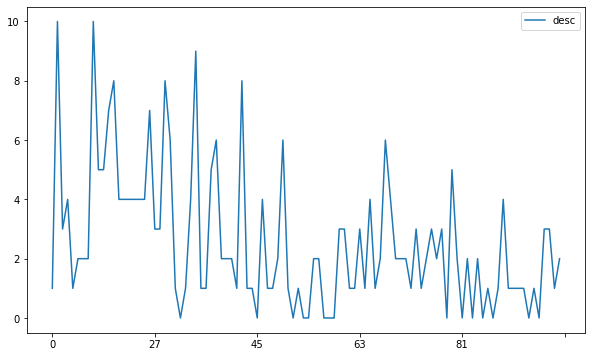

In [227]:
pd.DataFrame(json.loads(stats['dist'])).plot(figsize=(10,6))